In [5]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
import keras
import keras_tuner as kt

# pengaturan agar semua kolom terlihat
pd.set_option('display.max_columns', None)

In [13]:
# buka dataset
dataset = pd.read_csv('Covid Dataset.csv')
dataset.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [7]:
#cek jumlah baris, kolom, tipe data, dan null values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [8]:
# cek kejanggalan pada data
dataset.describe()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,Yes,No,No,Yes,No,Yes,No,No,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,2771,2821,2883,2983,2726,2924,2820,3172,5434,5434,4383


In [9]:
# mengubah Yes dan No menjadi 1 dan 0 untuk pengolahan lebih lanjut
ordinal_encoder = OrdinalEncoder()
data = ordinal_encoder.fit_transform(dataset).astype(np.int64)
print(data)

[[1 1 1 ... 0 0 1]
 [1 1 1 ... 0 0 1]
 [1 1 1 ... 0 0 1]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


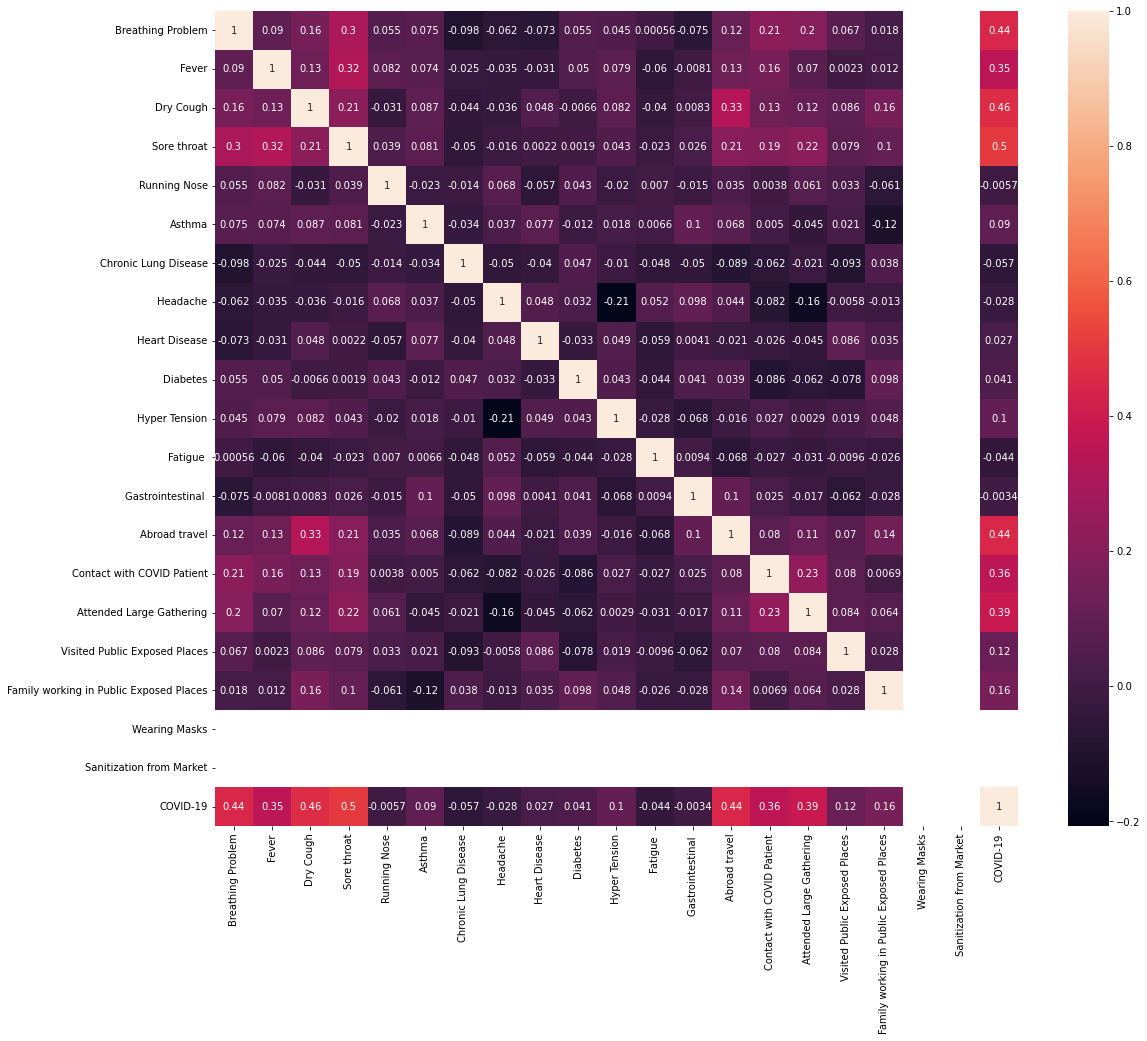

Number of "Yes" values in "Wearing Mask" column:  0
Number of "Yes" values in "Sanitization from Market" column:  0


In [10]:
# uji korelasi
dataset2 = pd.DataFrame(data, columns=dataset.columns) # membuat DataFrame untuk uji korelasi

# membuat heatmap korelasi
plt.figure(figsize=(18, 15))
sns.heatmap(dataset2.corr(), annot=True)
plt.show()

# menunjukkan bahwa pada dataset tidak ada yang memakai masker atau cuci tangan saat ke pasar
print('Number of "Yes" values in "Wearing Mask" column: ', sum([x[-3] for x in data]))
print('Number of "Yes" values in "Sanitization from Market" column: ', sum([x[-2] for x in data]))

Dari hasil di atas, terlihat bahwa *Breating Problem*, *Fever*, *Dry Cough*, *Sore Throat*, *Abroad Travel*, *Contact with COVID Patient*, dan *Attended Large Gathering* adalah faktor yang berkorelasi tinggi dengan infeksi COVID-19. Terdapat faktor-faktor lain yang memiliki korelasi dengan infeksi COVID-19 walau dengan derajat rendah, seperti *Asthma*, *Hyper Tension*, *Visited Public Exposed Places*, dan *Family working in Public Exposed Places*. Faktor-faktor ini selanjutnya akan digunakan untuk prediksi infeksi COVID-19.

In [11]:
X = data[:, [0, 1, 2, 3, 5, 10, 13, 14, 15, 16, 17]]
# X = data[:, :-1]
y = data[:,-1]

X.shape, y.shape

((5434, 11), (5434,))

In [8]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_full.shape, X_test.shape, y_train_full.shape, y_test.shape

X_valid, X_train = X_train_full[:434], X_train_full[434:]
y_valid, y_train = y_train_full[:434], y_train_full[434:]

X_valid.shape, y_valid.shape

((434, 11), (434,))

Selanjutnya, dibangun *neural network* dengan 11 neuron masukan (yang bersesuaian dengan banyak faktor yang dipilih) dan beberapa jumlah *layer* dan *neuron* per *layer* yang akan dioptimasi melalui *hyperparameter tuning*.

In [10]:
# model = Sequential()
# model.add(Dense(14, input_dim = len(X_train[0]), activation = 'relu'))
# model.add(Dense(7, activation = 'relu'))
# model.add(Dense(1, activation = 'sigmoid'))
def build_model(hp):
    model = keras.models.Sequential() # simpan model
    model.add(Dense(11, input_dim = len(X_train[0]), activation = 'relu'))
    
    hp_layers = hp.Choice('layer', [2, 3, 4])
    hp_neurons = hp.Int('neuron', min_value=5, max_value=20, step=5)
    
    for layers in range(hp_layers):
        model.add(keras.layers.Dense(hp_neurons, activation='relu'))
    
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [11]:
# hyperparameter tuning
tuner = kt.Hyperband(build_model, objective='val_accuracy', max_epochs=10, directory='ta_sd', project_name='tasd')

# early stopping
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# pencarian hyperparameter
tuner.search(X_train, y_train, epochs=50, validation_data=[X_valid, y_valid], callbacks=[stop_early])

# membangun model
best_hps = tuner.get_best_hyperparameters()[0]
model = tuner.hypermodel.build(best_hps)

Trial 18 Complete [00h 00m 03s]
val_accuracy: 0.9769585132598877

Best val_accuracy So Far: 0.9769585132598877
Total elapsed time: 00h 00m 45s
INFO:tensorflow:Oracle triggered exit


Didapat model sebagai berikut:

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 11)                132       
                                                                 
 dense_7 (Dense)             (None, 20)                240       
                                                                 
 dense_8 (Dense)             (None, 20)                420       
                                                                 
 dense_9 (Dense)             (None, 20)                420       
                                                                 
 dense_10 (Dense)            (None, 20)                420       
                                                                 
 dense_11 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,653
Trainable params: 1,653
Non-traina

Dilakukan pelatihan model.

In [13]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, epochs = 50, verbose = 1, validation_data=[X_valid, y_valid], callbacks=[stop_early])

Epoch 1/50
123/123 [==============================] - 2s 6ms/step - loss: 0.4242 - accuracy: 0.8122 - val_loss: 0.2538 - val_accuracy: 0.9124
Epoch 2/50
123/123 [==============================] - 1s 5ms/step - loss: 0.1705 - accuracy: 0.9438 - val_loss: 0.1104 - val_accuracy: 0.9562
Epoch 3/50
123/123 [==============================] - 1s 4ms/step - loss: 0.1003 - accuracy: 0.9632 - val_loss: 0.0839 - val_accuracy: 0.9677
Epoch 4/50
123/123 [==============================] - 1s 4ms/step - loss: 0.0803 - accuracy: 0.9688 - val_loss: 0.0892 - val_accuracy: 0.9608
Epoch 5/50
123/123 [==============================] - 1s 4ms/step - loss: 0.0795 - accuracy: 0.9665 - val_loss: 0.0729 - val_accuracy: 0.9700
Epoch 6/50
123/123 [==============================] - 0s 4ms/step - loss: 0.0741 - accuracy: 0.9673 - val_loss: 0.0709 - val_accuracy: 0.9677
Epoch 7/50
123/123 [==============================] - 0s 4ms/step - loss: 0.0638 - accuracy: 0.9755 - val_loss: 0.0673 - val_accuracy: 0.9654
Epoch 

In [16]:
model.evaluate(X_valid, y_valid)

14/14 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 0.9770


[0.04406331852078438, 0.9769585132598877]

In [17]:
model.evaluate(X_test, y_test)

34/34 [==============================] - 0s 3ms/step - loss: 0.0381 - accuracy: 0.9788


[0.03806861490011215, 0.9788408279418945]

In [18]:
y_pred_proba = model.predict(X_test)
print(y_pred_proba)

[[0.99990046]
 [0.00124177]
 [0.9999306 ]
 ...
 [0.9999827 ]
 [0.9999989 ]
 [0.99999696]]


In [19]:
y_pred = (y_pred_proba >= 0.5).astype(np.int64)

In [20]:
print(y_pred)

[[1]
 [0]
 [1]
 ...
 [1]
 [1]
 [1]]


In [21]:
print(y_test)

[1 0 1 ... 1 1 1]


Dievaluasi model yang didapat dengan *confusion matrix*.

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       203
           1       0.99      0.99      0.99       884

    accuracy                           0.98      1087
   macro avg       0.96      0.97      0.97      1087
weighted avg       0.98      0.98      0.98      1087

